<a href="https://colab.research.google.com/github/Edgar121207/MSCI-151/blob/main/CW4_Muhammad_Edgar_Al_Farizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

df = pd.read_excel('/content/sample_data/MSCI151 Data.xlsx')

display(df.columns)

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/MSCI151 Data.xlsx'

In [52]:
from sklearn.linear_model import LassoCV
import pandas as pd

# Define the features (X) and target (y) for LASSO filtering
features_lasso = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_lasso = df[features_lasso]
y_lasso = df['Profitability'] # Assuming 'Profitability' is the target based on previous OLS analysis

# Initialize and fit LassoCV model
# LassoCV automatically performs cross-validation to find the best alpha
model_lasso = LassoCV(cv=5, random_state=0).fit(X_lasso, y_lasso)

# Features whose coefficients are non-zero are the selected ones
selected_features_lasso = X_lasso.columns[model_lasso.coef_ != 0]

print("Selected features by LASSO filtering:")
display(selected_features_lasso)

Selected features by LASSO filtering:


Index(['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience',
       'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'PoB'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
features = ['debt','CEO Gender']
target = 'Profitability'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

In [ ]:
df = pd.read_excel('/content/MSCI151 DataE.xlsx')
display(df.columns)

In [ ]:
import statsmodels.api as sm

# Define the features (X) and target (y) for OLS
features_ols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_ols = df[features_ols]
y_ols = df['Profitability']

# Add an intercept to the features
X_ols = sm.add_constant(X_ols)

# Fit the OLS model with robust standard errors
model_ols = sm.OLS(y_ols, X_ols).fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the model summary
print(model_ols.summary())

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define the features for PCA
features_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_pca = df[features_pca]

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Display the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
print(pca.explained_variance_ratio_.cumsum())

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_pca)

# Display the loading factors
print("\nLoading Factors:")
display(loading_factors)

##High Inflation

In [15]:
import pandas as pd

df = pd.read_excel('/High Inflation Data Excel.xlsx')

display(df.columns)

Index(['id', 'Profitability', 'Probability', 'New Profitability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment',
       'Politicians', 'PoB'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
features = ['debt','CEO Gender']
target = 'New Profitability'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (97, 2)
Testing set shape: (25, 2)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 181.38
R-squared (R2): -2.94


In [22]:
df = pd.read_excel('/High Inflation Data Excel.xlsx')
display(df.columns)

Index(['id', 'Profitability', 'Probability', 'New Profitability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment',
       'Politicians', 'PoB'],
      dtype='object')

In [20]:
import statsmodels.api as sm

# Define the features (X) and target (y) for OLS
features_ols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_ols = df[features_ols]
y_ols = df['Profitability']

# Add an intercept to the features
X_ols = sm.add_constant(X_ols)

# Fit the OLS model with robust standard errors
model_ols = sm.OLS(y_ols, X_ols).fit(cov_type='HC1') # HC1 is a common type of robust standard error

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define the features for PCA
features_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_pca = df[features_pca]

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Display the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
print(pca.explained_variance_ratio_.cumsum())

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_pca)

# Display the loading factors
print("\nLoading Factors:")
display(loading_factors)

Explained Variance Ratio:
[0.15931254 0.13368067 0.11685014 0.10364674 0.09935558 0.08834241
 0.08019509 0.07584441 0.05670512 0.05112469 0.03494261]

Cumulative Explained Variance Ratio:
[0.15931254 0.29299321 0.40984335 0.51349009 0.61284568 0.70118808
 0.78138318 0.85722759 0.91393271 0.96505739 1.        ]

Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
debt,-0.131991,0.502578,0.313607,0.004470,-0.267823,-0.028464,-0.284700,0.369184,0.562301,0.031360,-0.156739
RnD,0.224071,-0.032987,0.294995,-0.347280,0.492952,0.353415,-0.353191,0.292277,-0.203950,-0.336693,-0.089702
Firm Age,0.387485,-0.145788,0.343326,-0.043984,-0.394454,-0.065994,-0.032412,-0.515786,0.141718,-0.483698,-0.166466
Firm Size,0.331001,-0.196251,0.181480,0.131697,-0.267625,-0.191615,0.450177,0.660840,-0.205351,-0.087318,-0.064369
CEO Experience,0.172530,-0.445192,0.452058,0.286387,0.001018,0.074744,-0.332540,-0.029965,0.078939,0.547279,0.250698
foreign sales,-0.135772,-0.021226,-0.075262,0.805230,0.144969,0.245036,-0.064559,0.070620,0.082457,-0.466228,0.112581
CEO education,0.554687,0.382096,-0.148767,-0.043392,0.072468,0.031068,0.089806,-0.021298,0.161534,-0.010550,0.693808
CEO Gender,0.537445,0.007124,-0.373406,0.187926,0.216025,0.105989,-0.010263,-0.018173,0.263981,0.254732,-0.586041
Marketing,-0.117081,-0.358462,-0.158543,-0.261194,-0.233400,0.671197,0.267537,0.100234,0.407113,-0.018604,0.108389
Product Sentiment,-0.029709,-0.461472,-0.284636,-0.155736,0.172646,-0.536977,-0.250447,0.186128,0.426631,-0.247799,0.148169


In [48]:
from sklearn.linear_model import LassoCV

# LassoCV automatically performs feature selection by setting coefficients to zero
model = LassoCV(cv=5, random_state=0).fit(X, y)

# Features whose coefficients are non-zero are the selected ones
selected_features = X.columns[model.coef_ != 0]

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Get importance scores (MDI)
importance = model.feature_importances_

In [50]:
# Display feature importances
feature_importance_series = pd.Series(importance, index=features)
print("Feature Importances (Mean Decrease Impurity):")
display(feature_importance_series.sort_values(ascending=False))

Feature Importances (Mean Decrease Impurity):


,0
debt,0.813592
CEO Gender,0.186408


In [39]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
# Get mean importance scores
importance = r.importances_mean

##Good Economy

Feature Importances (Mean Decrease Impurity):


,0
debt,0.818497
CEO Gender,0.181503


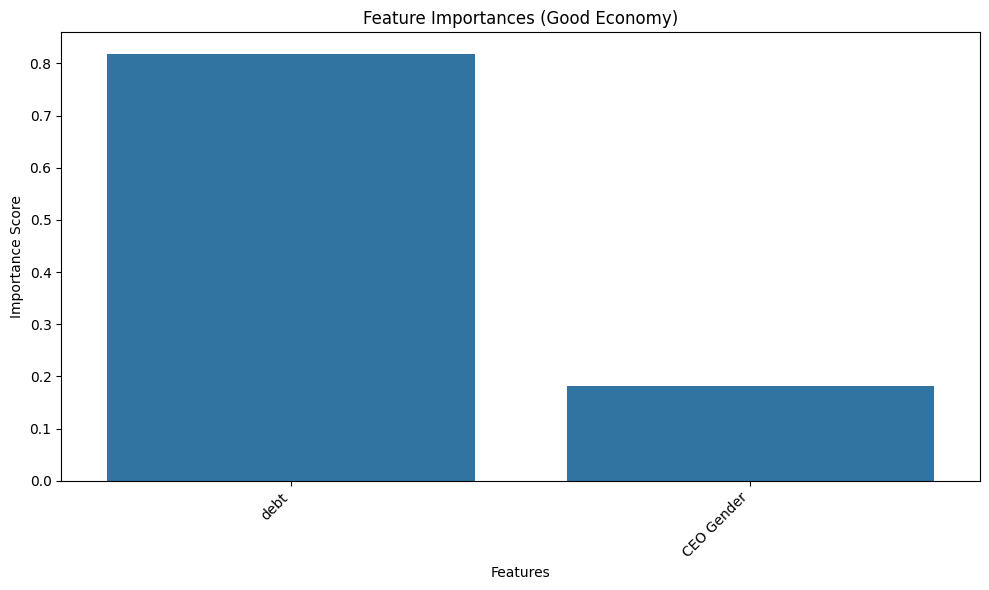

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 'Good economy' data
df = pd.read_excel('/Good econ data.xlsx')

# Define the features (X) and target (y) - assuming 'New Profitability' is the target as in previous analysis
features = ['debt','CEO Gender']
target = 'New Profitability'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get importance scores (MDI)
importance = model.feature_importances_

# Display feature importances
feature_importance_series = pd.Series(importance, index=features)
print("Feature Importances (Mean Decrease Impurity):")
display(feature_importance_series.sort_values(ascending=False))

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_series.index, y=feature_importance_series.values)
plt.title('Feature Importances (Good Economy)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

df = pd.read_excel('/Good econ data.xlsx')

display(df.columns)

Index(['id', 'Profitability', 'Probability', 'New Profitability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment',
       'Politicians', 'PoB'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
features = ['debt','CEO Gender']
target = 'New Profitability'

X = df[features]
y = df[target]

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (97, 2)
Testing set shape: (25, 2)


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 181.38
R-squared (R2): -2.94


In [23]:
df = pd.read_excel('/Good econ data.xlsx')
display(df.columns)

Index(['id', 'Profitability', 'Probability', 'New Profitability', 'debt',
       'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales',
       'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment',
       'Politicians', 'PoB'],
      dtype='object')

In [12]:
import statsmodels.api as sm

# Define the features (X) and target (y) for OLS
features_ols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_ols = df[features_ols]
y_ols = df['Profitability']

# Add an intercept to the features
X_ols = sm.add_constant(X_ols)

# Fit the OLS model with robust standard errors
model_ols = sm.OLS(y_ols, X_ols).fit(cov_type='HC1') # HC1 is a common type of robust standard error

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Define the features for PCA
features_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product Sentiment','PoB']
X_pca = df[features_pca]

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca_result = pca.fit_transform(X_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Display the cumulative explained variance ratio
print("\nCumulative Explained Variance Ratio:")
print(pca.explained_variance_ratio_.cumsum())

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features_pca)

# Display the loading factors
print("\nLoading Factors:")
display(loading_factors)

Explained Variance Ratio:
[0.15931254 0.13368067 0.11685014 0.10364674 0.09935558 0.08834241
 0.08019509 0.07584441 0.05670512 0.05112469 0.03494261]

Cumulative Explained Variance Ratio:
[0.15931254 0.29299321 0.40984335 0.51349009 0.61284568 0.70118808
 0.78138318 0.85722759 0.91393271 0.96505739 1.        ]

Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
debt,-0.131991,0.502578,0.313607,0.004470,-0.267823,-0.028464,-0.284700,0.369184,0.562301,0.031360,-0.156739
RnD,0.224071,-0.032987,0.294995,-0.347280,0.492952,0.353415,-0.353191,0.292277,-0.203950,-0.336693,-0.089702
Firm Age,0.387485,-0.145788,0.343326,-0.043984,-0.394454,-0.065994,-0.032412,-0.515786,0.141718,-0.483698,-0.166466
Firm Size,0.331001,-0.196251,0.181480,0.131697,-0.267625,-0.191615,0.450177,0.660840,-0.205351,-0.087318,-0.064369
CEO Experience,0.172530,-0.445192,0.452058,0.286387,0.001018,0.074744,-0.332540,-0.029965,0.078939,0.547279,0.250698
foreign sales,-0.135772,-0.021226,-0.075262,0.805230,0.144969,0.245036,-0.064559,0.070620,0.082457,-0.466228,0.112581
CEO education,0.554687,0.382096,-0.148767,-0.043392,0.072468,0.031068,0.089806,-0.021298,0.161534,-0.010550,0.693808
CEO Gender,0.537445,0.007124,-0.373406,0.187926,0.216025,0.105989,-0.010263,-0.018173,0.263981,0.254732,-0.586041
Marketing,-0.117081,-0.358462,-0.158543,-0.261194,-0.233400,0.671197,0.267537,0.100234,0.407113,-0.018604,0.108389
Product Sentiment,-0.029709,-0.461472,-0.284636,-0.155736,0.172646,-0.536977,-0.250447,0.186128,0.426631,-0.247799,0.148169


In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Get importance scores (MDI)
importance = model.feature_importances_

In [37]:
# Display feature importances
feature_importance_series = pd.Series(importance, index=features)
print("Feature Importances (Mean Decrease Impurity):")
display(feature_importance_series.sort_values(ascending=False))

Feature Importances (Mean Decrease Impurity):


,0
debt,0.824854
CEO Gender,0.175146


In [38]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
# Get mean importance scores
importance = r.importances_mean